In [1]:
import torch as th
import numpy as np
import torchvision as thv
import matplotlib.pyplot as plt

from segformer_net.segformer import Segformer
from data_utils import SegmentationCOCOSet
from torch.utils.data import DataLoader
from trainer import SegmentationTrainer
from torchvision.transforms.v2 import Resize
from torch.nn import ModuleList
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import draw_segmentation_masks

plt.style.use("dark_background")

3
torch.Size([100, 45, 128, 128])


In [2]:
tf = Resize(size=(128, 128))

In [2]:
trainset = SegmentationCOCOSet(
    data_dir="C:\\Users\\1\\Downloads\\segmes.v18i.coco-segmentation",
    data_split="train",
    images_size=(512, 512)
)

In [4]:
model = Segformer(
    img_size=512,
    patch_s=64,
    cls_n=45,
    att_features=128,
    hiden_features=64,
    tr_out_features=32
)

3


In [5]:
# trainer = SegmentationTrainer(
#     run_folder="C:\\Users\\1\\Desktop\\PythonProjects\\computer_wision\\test\\segmentation\\segformer_net\\storage_segmenter_model",
#     model=model,    
#     train_set=trainset,
#     epochs=32
# )

In [6]:
# trainer.train() 

In [7]:
model.load_state_dict(th.load(
    f="C:\\Users\\1\\Desktop\\PythonProjects\\computer_wision\\test\\segmentation\\segformer_net\\storage_segmenter_model\\model_params (2).pt",
    weights_only=True,
    map_location=th.device("cpu")
))

<All keys matched successfully>

In [8]:
BATCH_SIZE = 32
test_loader = DataLoader(dataset=trainset, batch_size=32, shuffle=True)

In [9]:
images, segmentation_masks= next(iter(test_loader))
print(images.size(), segmentation_masks.size())

torch.Size([32, 3, 512, 512]) torch.Size([32, 45, 512, 512])


In [10]:
print(th.max(segmentation_masks[2]))

tensor(1.)


In [10]:
model_out = model(images)
print(th.max(model_out), th.mean(model_out), th.min(model_out))
model_out[model_out == th.mean(model_out).item()] = 1.0
model_out[model_out < th.mean(model_out).item()] = 0.0

tensor(0.0051, grad_fn=<MaxBackward1>) tensor(0.0020, grad_fn=<MeanBackward0>) tensor(0.0008, grad_fn=<MinBackward1>)


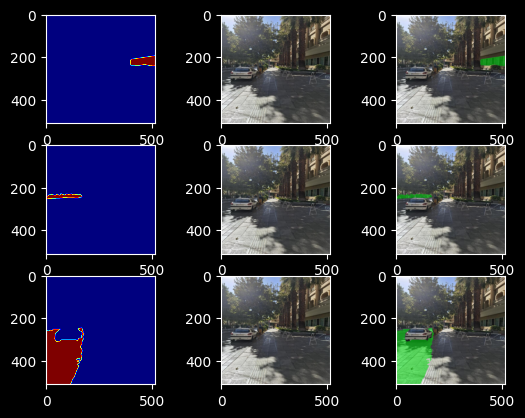

In [11]:
rd_idx = th.randint(0, 32, (1, )).item()
samples = []
for n in range(42):
    if th.max(segmentation_masks[rd_idx, n, :, :]) > 0.0:
        samples.append(np.array(to_pil_image(segmentation_masks[rd_idx, n, :, :])))

if len(samples) > 1:

    _, axis = plt.subplots(nrows=3, ncols=3)
    for i in range(3):
        axis[i, 0].imshow(samples[i], cmap="jet")
        axis[i, 1].imshow(np.asarray(to_pil_image(images[rd_idx, :, :, :])))
        axis[i, 2].imshow(np.asarray(to_pil_image(draw_segmentation_masks(
            images[rd_idx, :, :, :], 
            th.Tensor(samples[i]).to(th.bool), 
            colors=[(0, 223, 12)], 
            alpha =0.55
        ))))

elif len(samples) > 0:
    _, axis = plt.subplots()
    axis.imshow(samples[0], cmap="jet")


plt.show()


In [13]:
print(th.__version__)
print(thv.__version__)

2.5.1+cpu
0.20.0+cpu


In [12]:
colors = [
    th.randint(0, 256, (3, )).tolist()
    for _ in range(45)
]

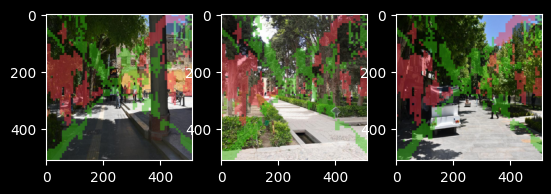

In [18]:
_, axis = plt.subplots(ncols=3)
for i in range(3):

    idx =  th.randint(0, 32, (1,)).item()
    image = images[idx, :, :, :]
    image = draw_segmentation_masks(image, model_out[idx, 2:4, :, :].to(th.bool), colors=colors, alpha=0.45)
    axis[i].imshow(np.asarray(to_pil_image(image)))

plt.show()